## Data Exploration for Conversion Use Case Framing
While in-depth EDA was performed by the data analyst and shared with the broader team, some data exploration was also used to support framing of the conversion use case.

In [1]:
import pandas as pd

In [9]:
from ydata_profiling import ProfileReport

/Users/aoluwolerotimi/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Basic cleaning prior to profile report

In [10]:
gtrain2 = pd.read_csv("/Users/aoluwolerotimi/Datasets/train_dejsonified.csv")

/var/folders/z1/1zds15w97_g7_fhs4_83dc3m0000gn/T/ipykernel_96522/644608812.py:1: DtypeWarning: Columns (2,54) have mixed types. Specify dtype option on import or set low_memory=False.
  gtrain2 = pd.read_csv("/Users/aoluwolerotimi/Datasets/train_dejsonified.csv")


In [11]:
gtrain2.shape

(903653, 55)

In [12]:
gtrain2.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation',
       'browser', 'browserVersion', 'browserSize', 'operatingSystem',
       'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'visits', 'hits', 'pageviews',
       'bounces', 'newVisits', 'transactionRevenue', 'campaign', 'source',
       'medium', 'keyword', 'adwordsClickInfo.criteriaParameters',
       'isTrueDirect', 'referralPath', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd',
       '

In [13]:
gtrain2.head().style

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,Organic Search,20160902,1131660440785968512,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,1,1,1.000000,1.000000,1.000000,nan,(not set),google,organic,(not provided),not available in demo dataset,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Organic Search,20160902,377306020877927872,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,1,1,1.000000,1.000000,1.000000,nan,(not set),google,organic,(not provided),not available in demo dataset,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Organic Search,20160902,3895546263509774336,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,1,1,1.000000,1.000000,1.000000,nan,(not set),google,organic,(not provided),not available in demo dataset,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Organic Search,20160902,4763447161404445696,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not avail

In [14]:
# find which columns only contain one value
single_value_columns = gtrain2.columns[gtrain2.nunique() == 1]
single_value_columns

Index(['socialEngagementType', 'cityId', 'latitude', 'longitude',
       'networkLocation', 'browserVersion', 'browserSize',
       'operatingSystemVersion', 'mobileDeviceBranding', 'mobileDeviceModel',
       'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName',
       'flashVersion', 'language', 'screenColors', 'screenResolution',
       'visits', 'bounces', 'newVisits', 'adwordsClickInfo.criteriaParameters',
       'isTrueDirect', 'adwordsClickInfo.isVideoAd', 'campaignCode'],
      dtype='object')

In [15]:
gtrain2 = gtrain2.drop(single_value_columns, axis=1)

In [16]:
gtrain2['conversion'] = gtrain2['transactionRevenue'].notnull().astype(int)

In [17]:
gtrain2['date'] = pd.to_datetime(gtrain2['date'], format="%Y%m%d")

In [18]:
gtrain2.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'continent', 'subContinent', 'country',
       'region', 'metro', 'city', 'networkDomain', 'browser',
       'operatingSystem', 'isMobile', 'deviceCategory', 'hits', 'pageviews',
       'transactionRevenue', 'campaign', 'source', 'medium', 'keyword',
       'referralPath', 'adwordsClickInfo.page', 'adwordsClickInfo.slot',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType', 'adContent',
       'conversion'],
      dtype='object')

In [19]:
def convert_to_categorical(df, columns):
    for column in columns:
        # Replace blanks with hyphens
        df[column] = df[column].str.replace(' ', '-', regex=False)
        # Convert to categorical type
        df[column] = df[column].astype('category')
    return df

In [20]:
textcols = ['country', 'region', 'metro', 'city', 'source', 'keyword', 'browser'] 
# columns which were previously appearing as text in earlier profile report iterations
gtrain2 = convert_to_categorical(gtrain2, textcols)

In [21]:
gtrain2.dtypes

channelGrouping                           object
date                              datetime64[ns]
fullVisitorId                             object
sessionId                                 object
visitId                                    int64
visitNumber                                int64
visitStartTime                             int64
continent                                 object
subContinent                              object
country                                 category
region                                  category
metro                                   category
city                                    category
networkDomain                             object
browser                                 category
operatingSystem                           object
isMobile                                    bool
deviceCategory                            object
hits                                       int64
pageviews                                float64
transactionRevenue  

In [24]:
# subsetting columns to profile (e.g. ommitting ID columns)
prof_cols = ['channelGrouping', 'date',
       'visitNumber', 'continent', 'subContinent', 'country',
       'region', 'metro', 'city', 'browser',
       'operatingSystem', 'isMobile', 'deviceCategory', 'hits', 'pageviews',
       'transactionRevenue', 'campaign', 'source', 'medium', 'keyword',
       'referralPath', 'adwordsClickInfo.page', 'adwordsClickInfo.slot',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType', 'adContent',
       'conversion']

In [25]:
# make copy of the columns in prof_cols from gtrain2 to new dataframe
gtrain2_prof = gtrain2[prof_cols].copy()

In [26]:
profile2 = ProfileReport(gtrain2_prof, title='Session Profile Report 2', explorative=True)

In [27]:
# profile2.to_file(output_file="Session Profile Report 2.html")

Summarize dataset:  85%|████████▌ | 29/34 [00:17<00:01,  4.00it/s, Calculate auto correlation]                      /Users/aoluwolerotimi/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/aoluwolerotimi/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/aoluwolerotimi/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 165.13it/s]


See outputs at [this OneDrive link](https://mcgill.sharepoint.com/:u:/s/INSY695-EnterpriseDSMLinProduction_Group/EWmvQmeg44ZMt1AIPAEaV2wBZ52AnOigWd48fKw4SBgKwA?e=8lPkG4)

### Exploring Visiting Behaviour

In [8]:
is_unique = gtrain['fullVisitorId'].duplicated().any()
print("Each value in the fullVisitorId column is unique:", not is_unique)

Each value in the fullVisitorId column is unique: False


Getting distribution of how often people come, and also a sense of how many duplicate IDs we should expect. 

While this is also contained within the profiling report, displaying here as this was a key driver of the decision to transform the dataset to user level.

In [39]:
max_visits_per_user = gtrain2.groupby('fullVisitorId')['visitNumber'].max().reset_index()

In [40]:
# create boxplot of visitNumber in max_visits_per_user
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

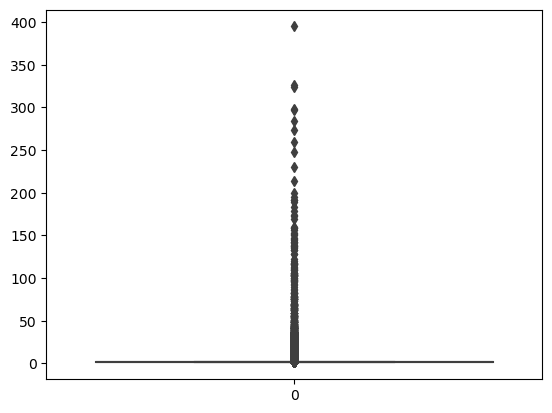

In [41]:
sns.boxplot(max_visits_per_user['visitNumber'])
plt.show()

In [35]:
# get min and max of visitNumber
print("Min:", max_visits_per_user['visitNumber'].min())
print("Max:", max_visits_per_user['visitNumber'].max())
# get median of visitNumber
print("Median:", max_visits_per_user['visitNumber'].median())

Min: 1
Max: 395
Median: 1.0


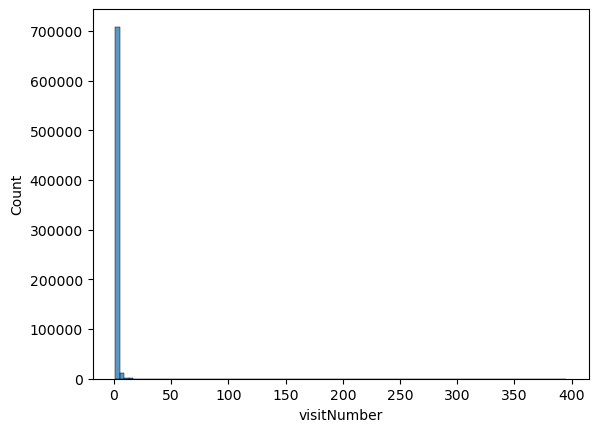

In [42]:
# plot histogram of visitNumber
sns.histplot(max_visits_per_user['visitNumber'], bins=100)
plt.show()